In [1]:
from matlab_utils import np2mat
import matlab.engine
import imageio


eng = matlab.engine.start_matlab()

eng.addpath("SourceCodePamplonaetal2013")
eng.addpath("SourceCodePamplonaetal2013/functionsAux/")

pass

In [35]:
def transform_sample(
    windowed_img, r, epsilon, chi, fov, img_size, interpolation_method="bicubic"
):
    windowed_img = np2mat(windowed_img)
    result = eng.transform_sample(
        windowed_img, r, epsilon, chi, fov, matlab.double(img_size), interpolation_method, nargout=3
    )
    return (np.array(x) for x in result)

In [36]:



img = imageio.imread("SourceCodePamplonaetal2013/IMG200.png")

epsilons = [20., 50.]
chis = [45., 45.]
r = 8.3350

fov = 120.
img_size = [5954., 5954.]

planar_sample_frame, spherical_sample, spherical_abrr_sample = transform_sample(img, r, epsilons[0], chis[0], fov, img_size)

In [37]:
spherical_sample

array([[0.28748133, 0.29292701, 0.28775408, ..., 0.22852243, 0.16671592,
        0.10717777],
       [0.27971165, 0.29216603, 0.28847455, ..., 0.2391156 , 0.18337535,
        0.12949339],
       [0.27519693, 0.28905437, 0.28900722, ..., 0.21458452, 0.17719216,
        0.14905766],
       ...,
       [0.24705016, 0.25883483, 0.24568764, ..., 0.47760473, 0.54448999,
        0.60582271],
       [0.24220362, 0.27513876, 0.26679702, ..., 0.43995519, 0.51972999,
        0.58740267],
       [0.24241514, 0.26553463, 0.26835894, ..., 0.38061707, 0.47260645,
        0.56598167]])

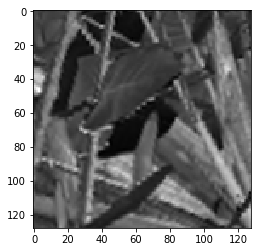

In [38]:
import matplotlib.pyplot as plt

plt.imshow(spherical_sample, cmap="gray")
plt.show()